In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [21]:
# filename = '/home/mark/installs/gpmp2/mark_gpmp2/paper/wam_matlab/data/results_log_0.2cost_0.2eps.csv'
# filename = '/home/mark/installs/gpmp2/mark_gpmp2/paper/wam_matlab/data/results_log_0.2cost_0.2eps_64env.csv'
filename = '/home/mark/data/rebuttal_wam_arm_matlab_results_full.csv'


In [22]:
# df = pd.read_csv(filename,
#                  header=None,
#                 names=['config', 'speed', 'static_cols', 
#                        'update_cols', 'full_cols', 
#                        'static_gp_cost', 'update_gp_cost', 'full_gp_cost',
#                        'static_obs_cost', 'update_obs_cost', 'full_obs_cost'])
df = pd.read_csv(filename,
                 header=None,
                names=['env_size', 'config', 'speed', 'static_cols', 
                       'update_cols', 'full_cols', 
                       'static_gp_cost', 'update_gp_cost', 'full_gp_cost',
                       'static_obs_cost', 'update_obs_cost', 'full_obs_cost'])

# Exclude 0.5 
df = df[df['speed']!=0.5]

# Check whether trajectory is collision-free
df['static_col_free_bool'] = (df['static_cols']==0).astype(int)
df['update_col_free_bool'] = (df['update_cols']==0).astype(int)
df['full_col_free_bool'] = (df['full_cols']==0).astype(int)

# Filter out where no planner found collision-free trajectory
no_solution_inds = (df['static_col_free_bool'] == True) | (df['update_col_free_bool'] == True) | (df['full_col_free_bool'] == True)
df = df[no_solution_inds]

In [23]:
df['config'].unique()

array([0.04])

In [24]:
df

,env_size,config,speed,static_cols,update_cols,full_cols,static_gp_cost,update_gp_cost,full_gp_cost,static_obs_cost,update_obs_cost,full_obs_cost,static_col_free_bool,update_col_free_bool,full_col_free_bool
1,64,0.04,0.1,0,0,0,27.119183,31.629097,22.669991,53.448975,52.420958,53.160174,1,1,1
1,64,0.04,0.1,0,0,0,22.551519,30.387394,23.068549,54.131921,51.272457,52.198007,1,1,1
1,64,0.04,0.1,0,0,0,22.681983,45.481144,25.863778,52.609085,52.976196,52.044566,1,1,1
1,64,0.04,0.1,0,0,0,22.551519,43.885892,23.672603,54.131921,50.268244,51.792170,1,1,1
1,64,0.04,0.1,0,0,0,22.551519,29.679863,23.198373,54.131921,53.942145,52.589548,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,64,0.04,0.7,6,0,2,17.816255,88.984486,70.345755,709.406271,454.519051,260.249675,0,1,0
7,64,0.04,0.7,6,0,2,17.816255,88.984486,70.345755,709.406271,454.519051,260.249675,0,1,0
7,64,0.04,0.7,6,0,2,17.816255,88.984486,70.345755,709.406271,454.519051,260.249675,0,1,0
7,64,0.04,0.7,6,0,2,17.816255,88.984486,70.345755,709.406271,454.519051,260.249675,0,1,0


In [6]:
sum(no_solution_inds)

10842

In [7]:
speed_group = df.groupby(['speed']);

# Means
speed_static_obs_cost = speed_group.mean()['static_obs_cost']
speed_update_obs_cost = speed_group.mean()['update_obs_cost']
speed_full_obs_cost = speed_group.mean()['full_obs_cost']

speed_static_gp_cost = speed_group.mean()['static_gp_cost']
speed_update_gp_cost = speed_group.mean()['update_gp_cost']
speed_full_gp_cost = speed_group.mean()['full_gp_cost']

speed_static_cols = speed_group.mean()['static_cols']
speed_update_cols = speed_group.mean()['update_cols']
speed_full_cols = speed_group.mean()['full_cols']


# Standard deviations

speed_static_obs_cost_std = speed_group.std()['static_obs_cost']
speed_update_obs_cost_std = speed_group.std()['update_obs_cost']
speed_full_obs_cost_std = speed_group.std()['full_obs_cost']

speed_static_gp_cost_std = speed_group.std()['static_gp_cost']
speed_update_gp_cost_std = speed_group.std()['update_gp_cost']
speed_full_gp_cost_std = speed_group.std()['full_gp_cost']

speed_static_cols_std = speed_group.std()['static_cols']
speed_update_cols_std = speed_group.std()['update_cols']
speed_full_cols_std = speed_group.std()['full_cols']

static_col_free_ratio = (speed_group.sum()/speed_group.count())['static_col_free_bool']
update_col_free_ratio = (speed_group.sum()/speed_group.count())['update_col_free_bool']
full_col_free_ratio = (speed_group.sum()/speed_group.count())['full_col_free_bool']

# Plots

In [8]:
font = {'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

<IPython.core.display.Javascript object>


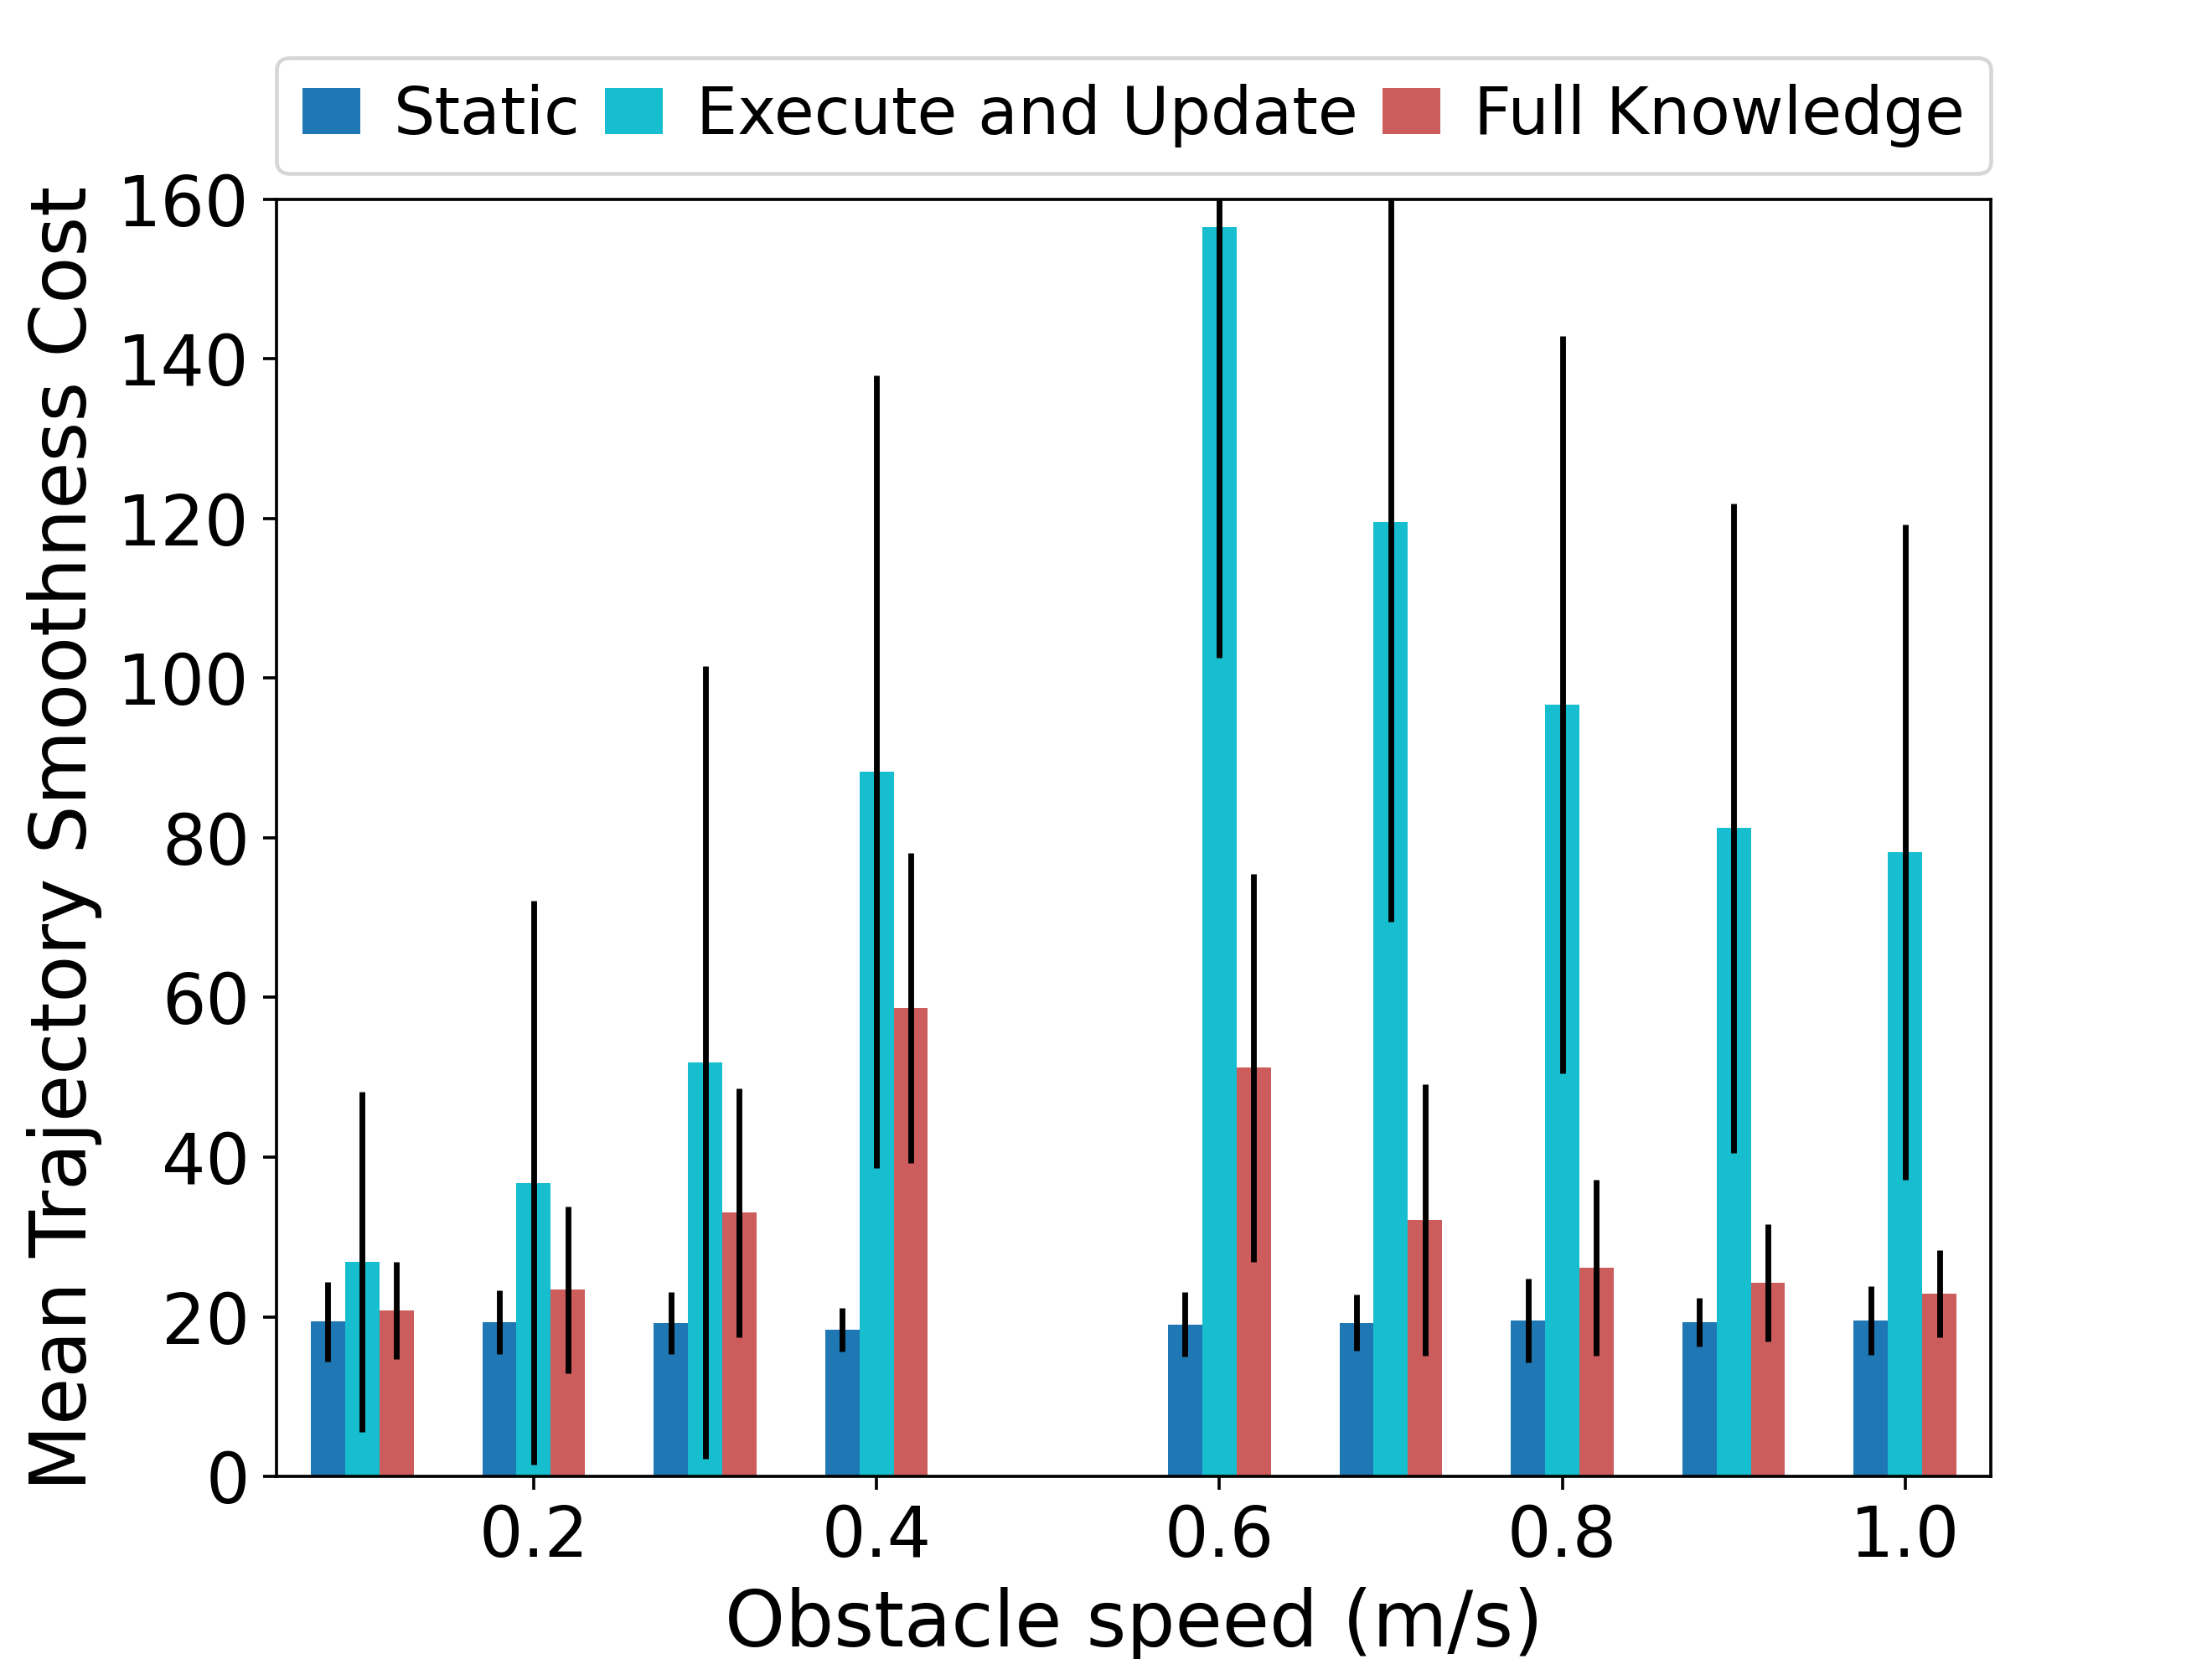

In [9]:
# speeds = (np.array(range(len(speed_static_cost)))+1)/10
speeds = np.array(df['speed'].unique())
fig, ax = plt.subplots(figsize=(8, 6), dpi=300,)    
# plt.figure(1);
plt.bar(speeds -0.02, 
        speed_static_gp_cost, yerr=speed_static_gp_cost_std, width=0.02, color='tab:blue', align='center', label='Static')
plt.bar(speeds, 
        speed_update_gp_cost, yerr=speed_update_gp_cost_std, width=0.02, color='tab:cyan', align='center', label='Execute and Update')
plt.bar(speeds +0.02,
        speed_full_gp_cost, yerr=speed_full_gp_cost_std, width=0.02, color='indianred', align='center', label='Full Knowledge')
plt.xlabel("Obstacle speed (m/s)", fontsize=20)
plt.ylabel("Mean Trajectory Smoothness Cost", fontsize=20)
leg = plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0., fontsize=17, handletextpad=-0.6)
for handle in leg.legendHandles:
    handle.set_width(15.0)
plt.ylim([0,160])
plt.xlim([0.05,1.05])
# plt.savefig('SinglePillar_SpeedVsMeanTrajSmoothnessCost_CF.png', dpi=300)
plt.show()

<IPython.core.display.Javascript object>


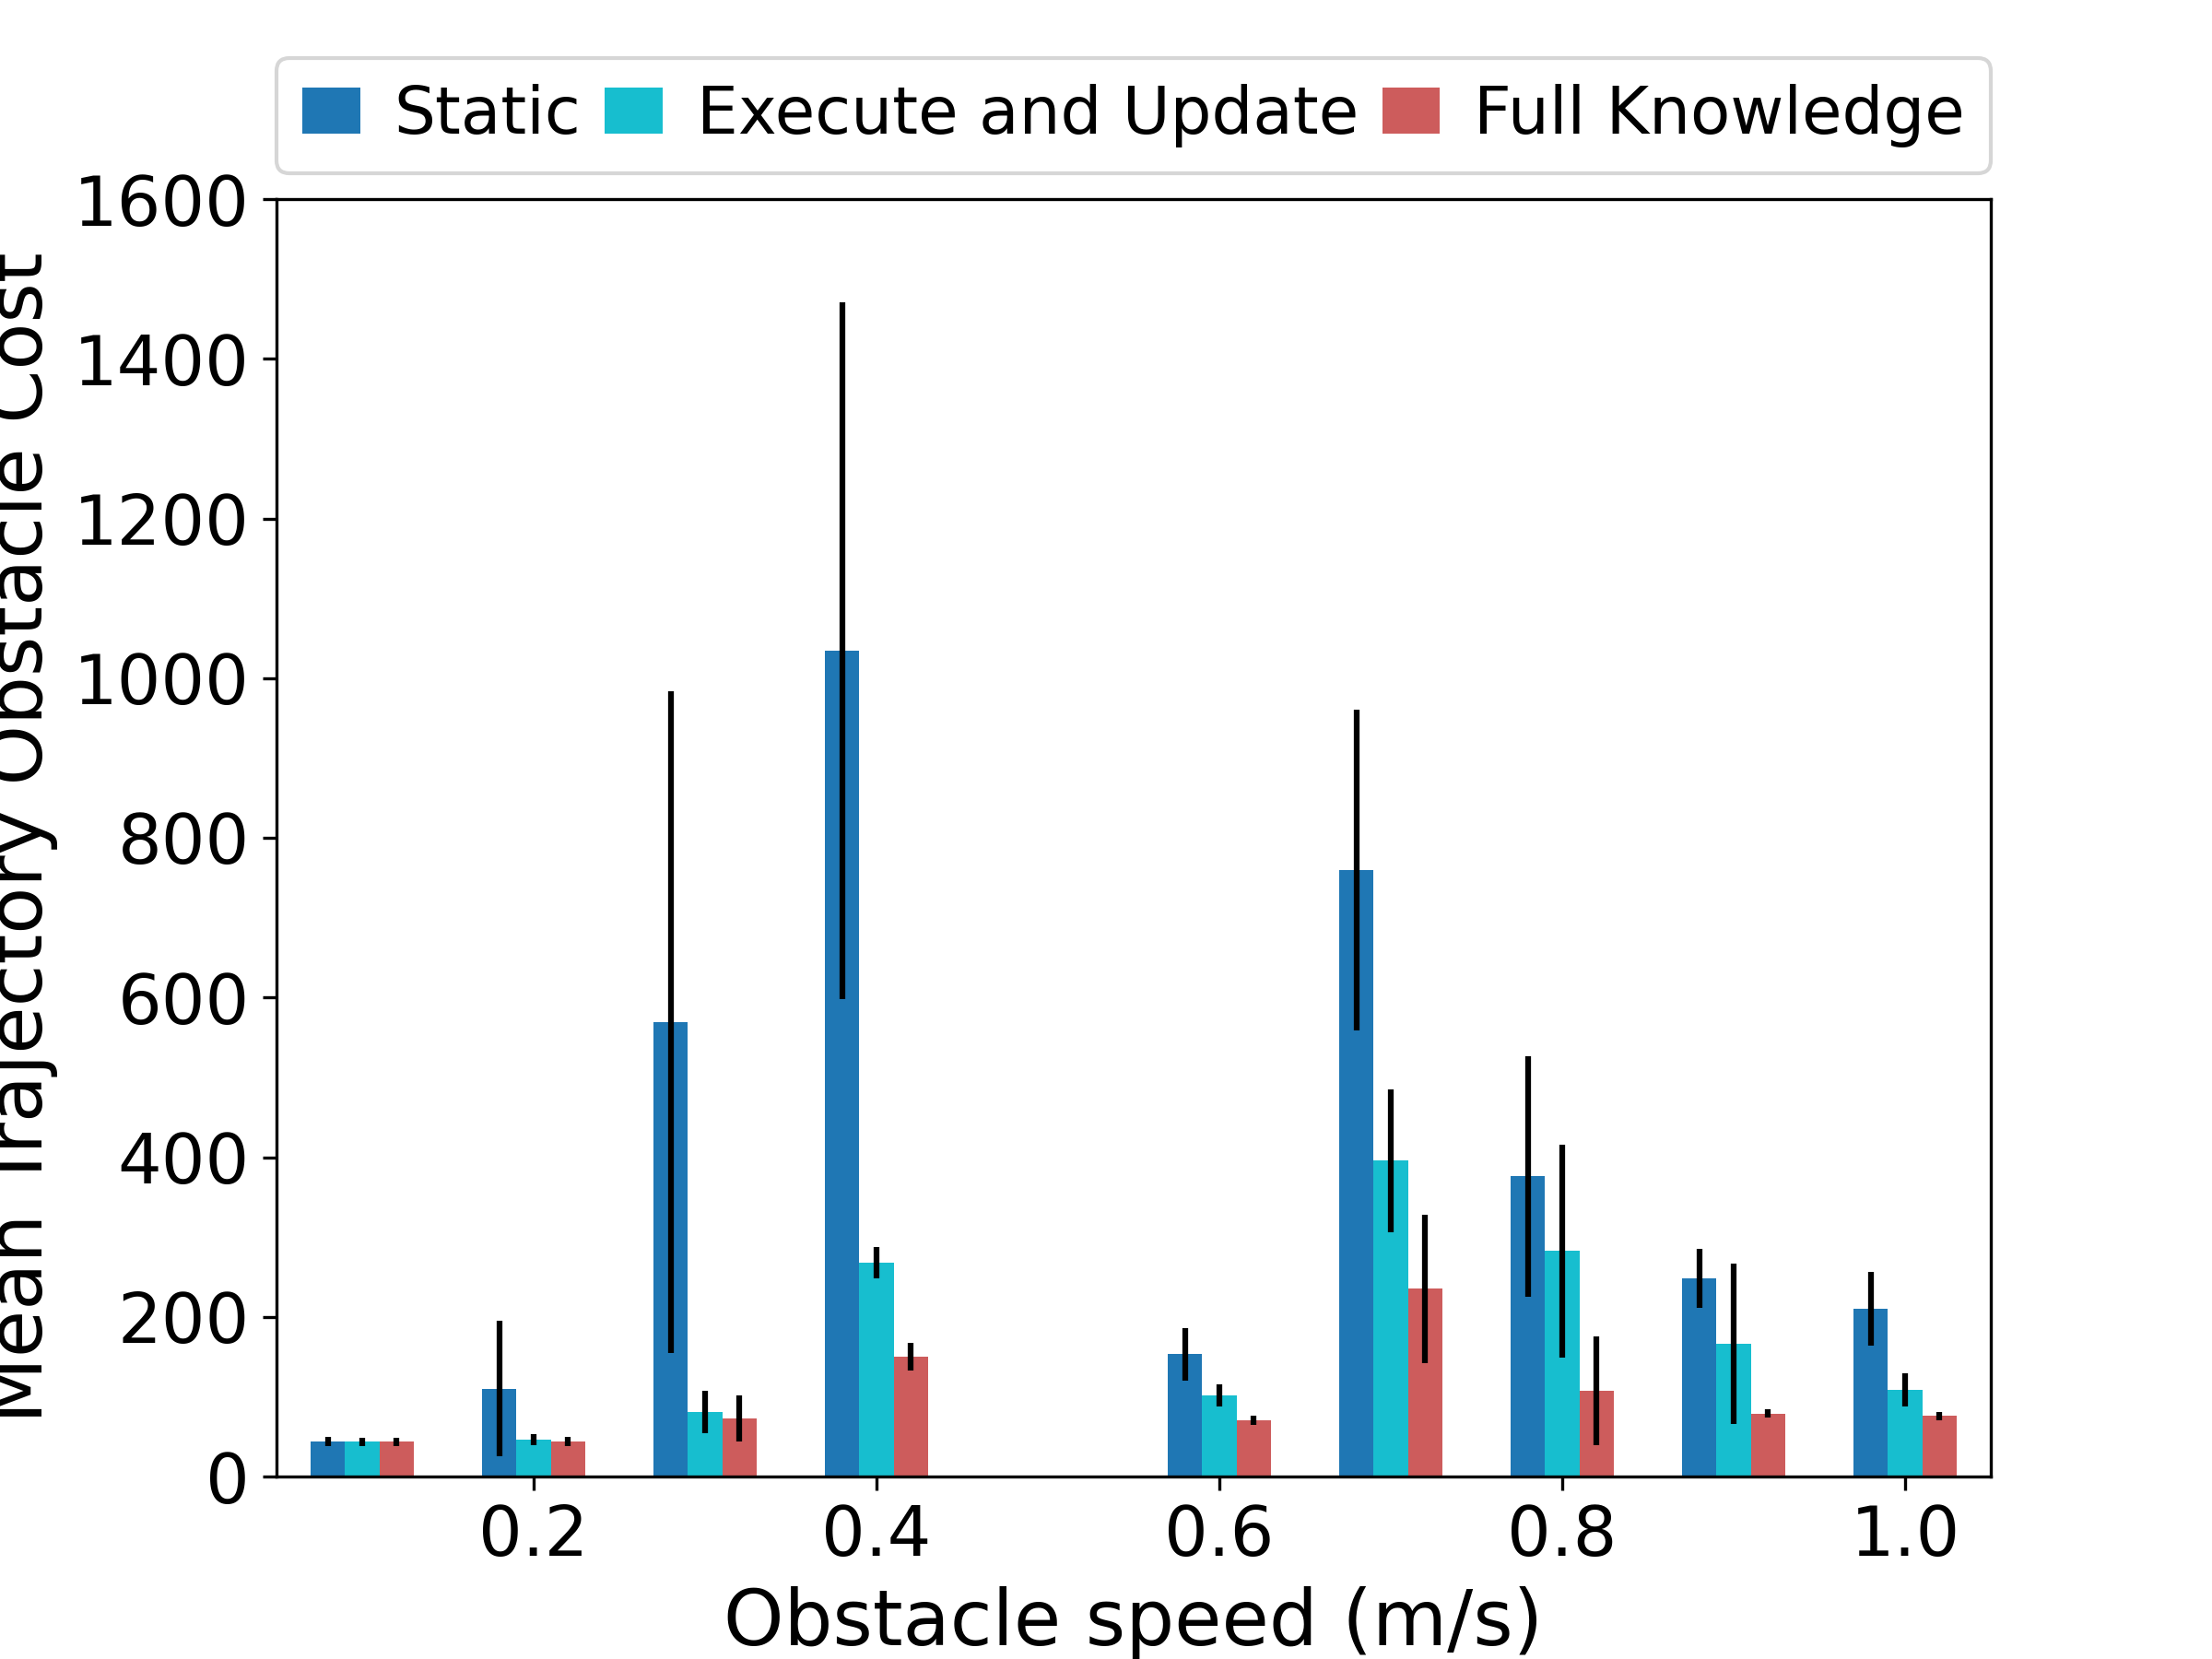

In [33]:
# speeds = (np.array(range(len(speed_static_cost)))+1)/10
speeds = np.array(df['speed'].unique())

# plt.figure(2);
fig, ax = plt.subplots(figsize=(8, 6), dpi=300,)    

plt.bar(speeds -0.02, 
        speed_static_obs_cost, yerr=speed_static_obs_cost_std, width=0.02, color='tab:blue', align='center', label='Static')
plt.bar(speeds, 
        speed_update_obs_cost, yerr=speed_update_obs_cost_std, width=0.02, color='tab:cyan', align='center', label='Execute and Update')
plt.bar(speeds +0.02,
        speed_full_obs_cost, yerr=speed_full_obs_cost_std, width=0.02, color='indianred', align='center', label='Full Knowledge')
plt.xlabel("Obstacle speed (m/s)", fontsize=20)
plt.ylabel("Mean Trajectory Obstacle Cost", fontsize=20)
leg = plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0., fontsize=17, handletextpad=-0.6)
for handle in leg.legendHandles:
    handle.set_width(15.0)
plt.ylim([0,1600])
plt.xlim([0.05,1.05])
# plt.savefig('SinglePillar_SpeedVsMeanTrajObstacleCost_CF.png', dpi=300)
plt.show()

<IPython.core.display.Javascript object>


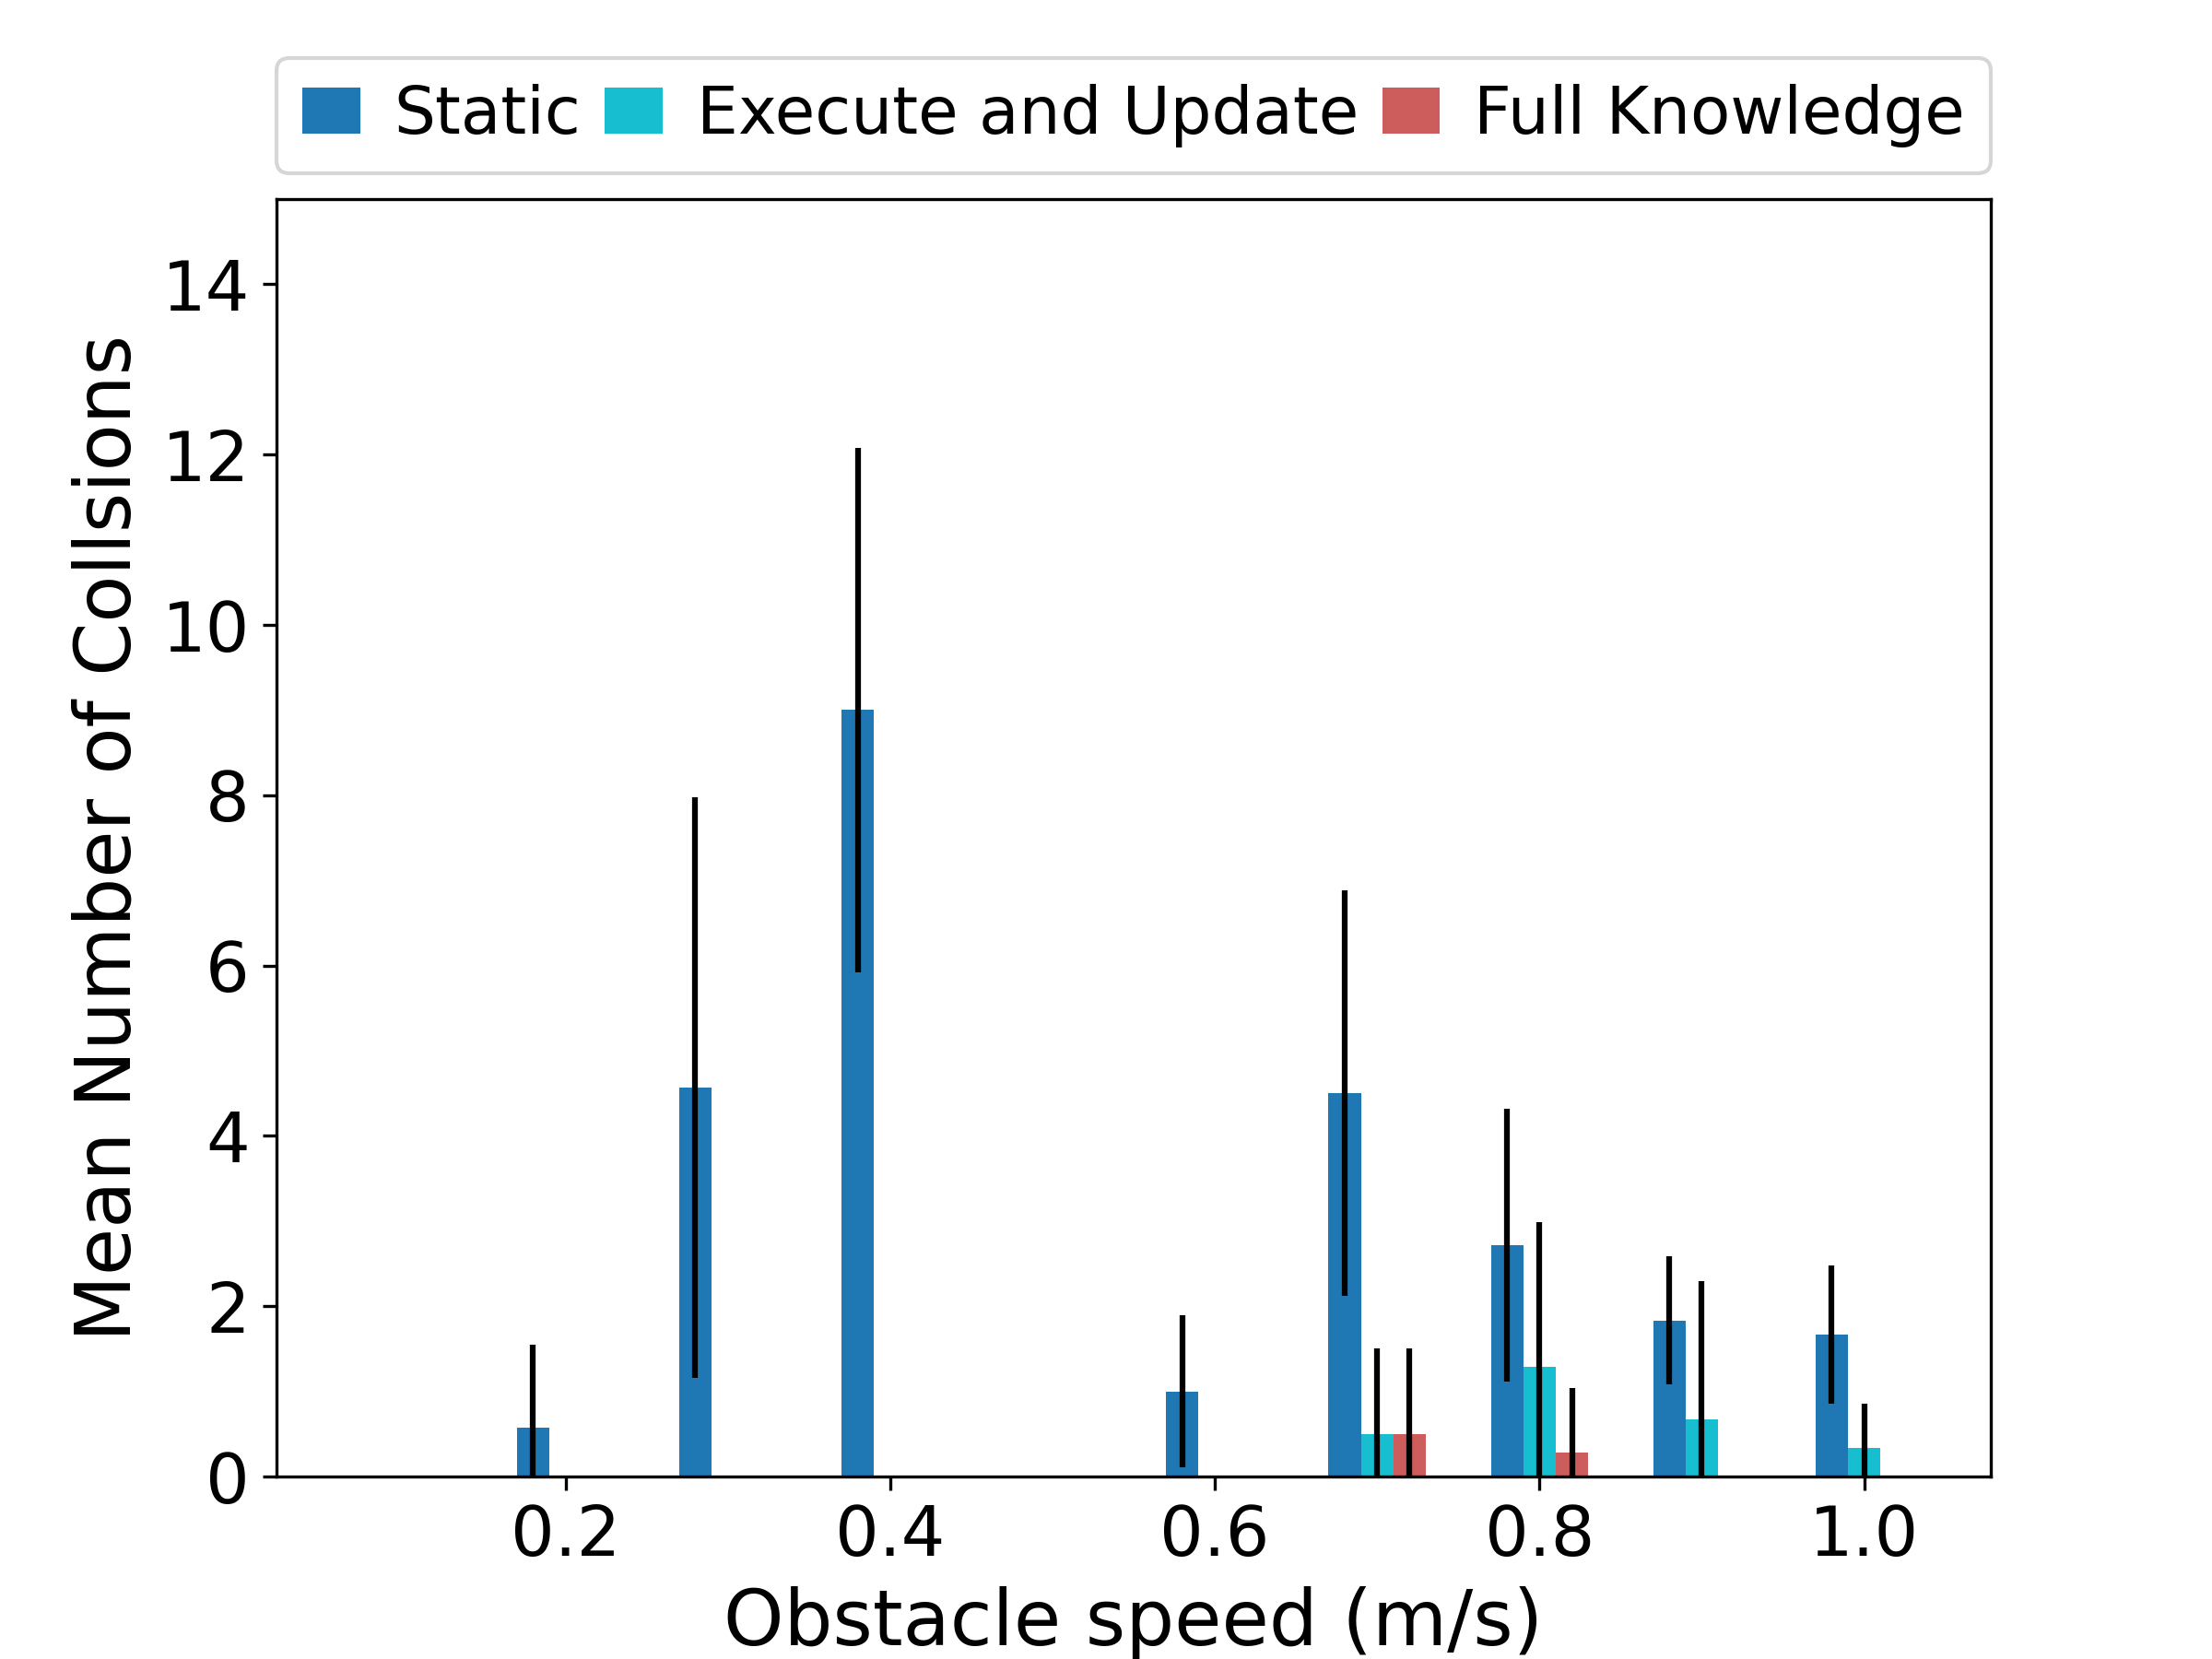

In [36]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=300,)    
# plt.figure(3);
plt.bar(speeds -0.02, speed_static_cols, yerr=speed_static_cols_std, width=0.02, color='tab:blue', align='center', label='Static')
plt.bar(speeds, speed_update_cols, yerr=speed_update_cols_std, width=0.02, color='tab:cyan', align='center', label='Execute and Update')
plt.bar(speeds + 0.02, speed_full_cols, yerr=speed_full_cols_std, width=0.02, color='indianred', align='center', label='Full Knowledge')
plt.xlabel("Obstacle speed (m/s)", fontsize=20)
plt.ylabel("Mean Number of Collsions", fontsize=20)
plt.ylim([0,15])
leg = plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0., fontsize=17, handletextpad=-0.6)
for handle in leg.legendHandles:
    handle.set_width(15.0)
# plt.savefig('SinglePillar_SpeedVsMeanCollisions_CF.png', dpi=300)

plt.show()

<IPython.core.display.Javascript object>


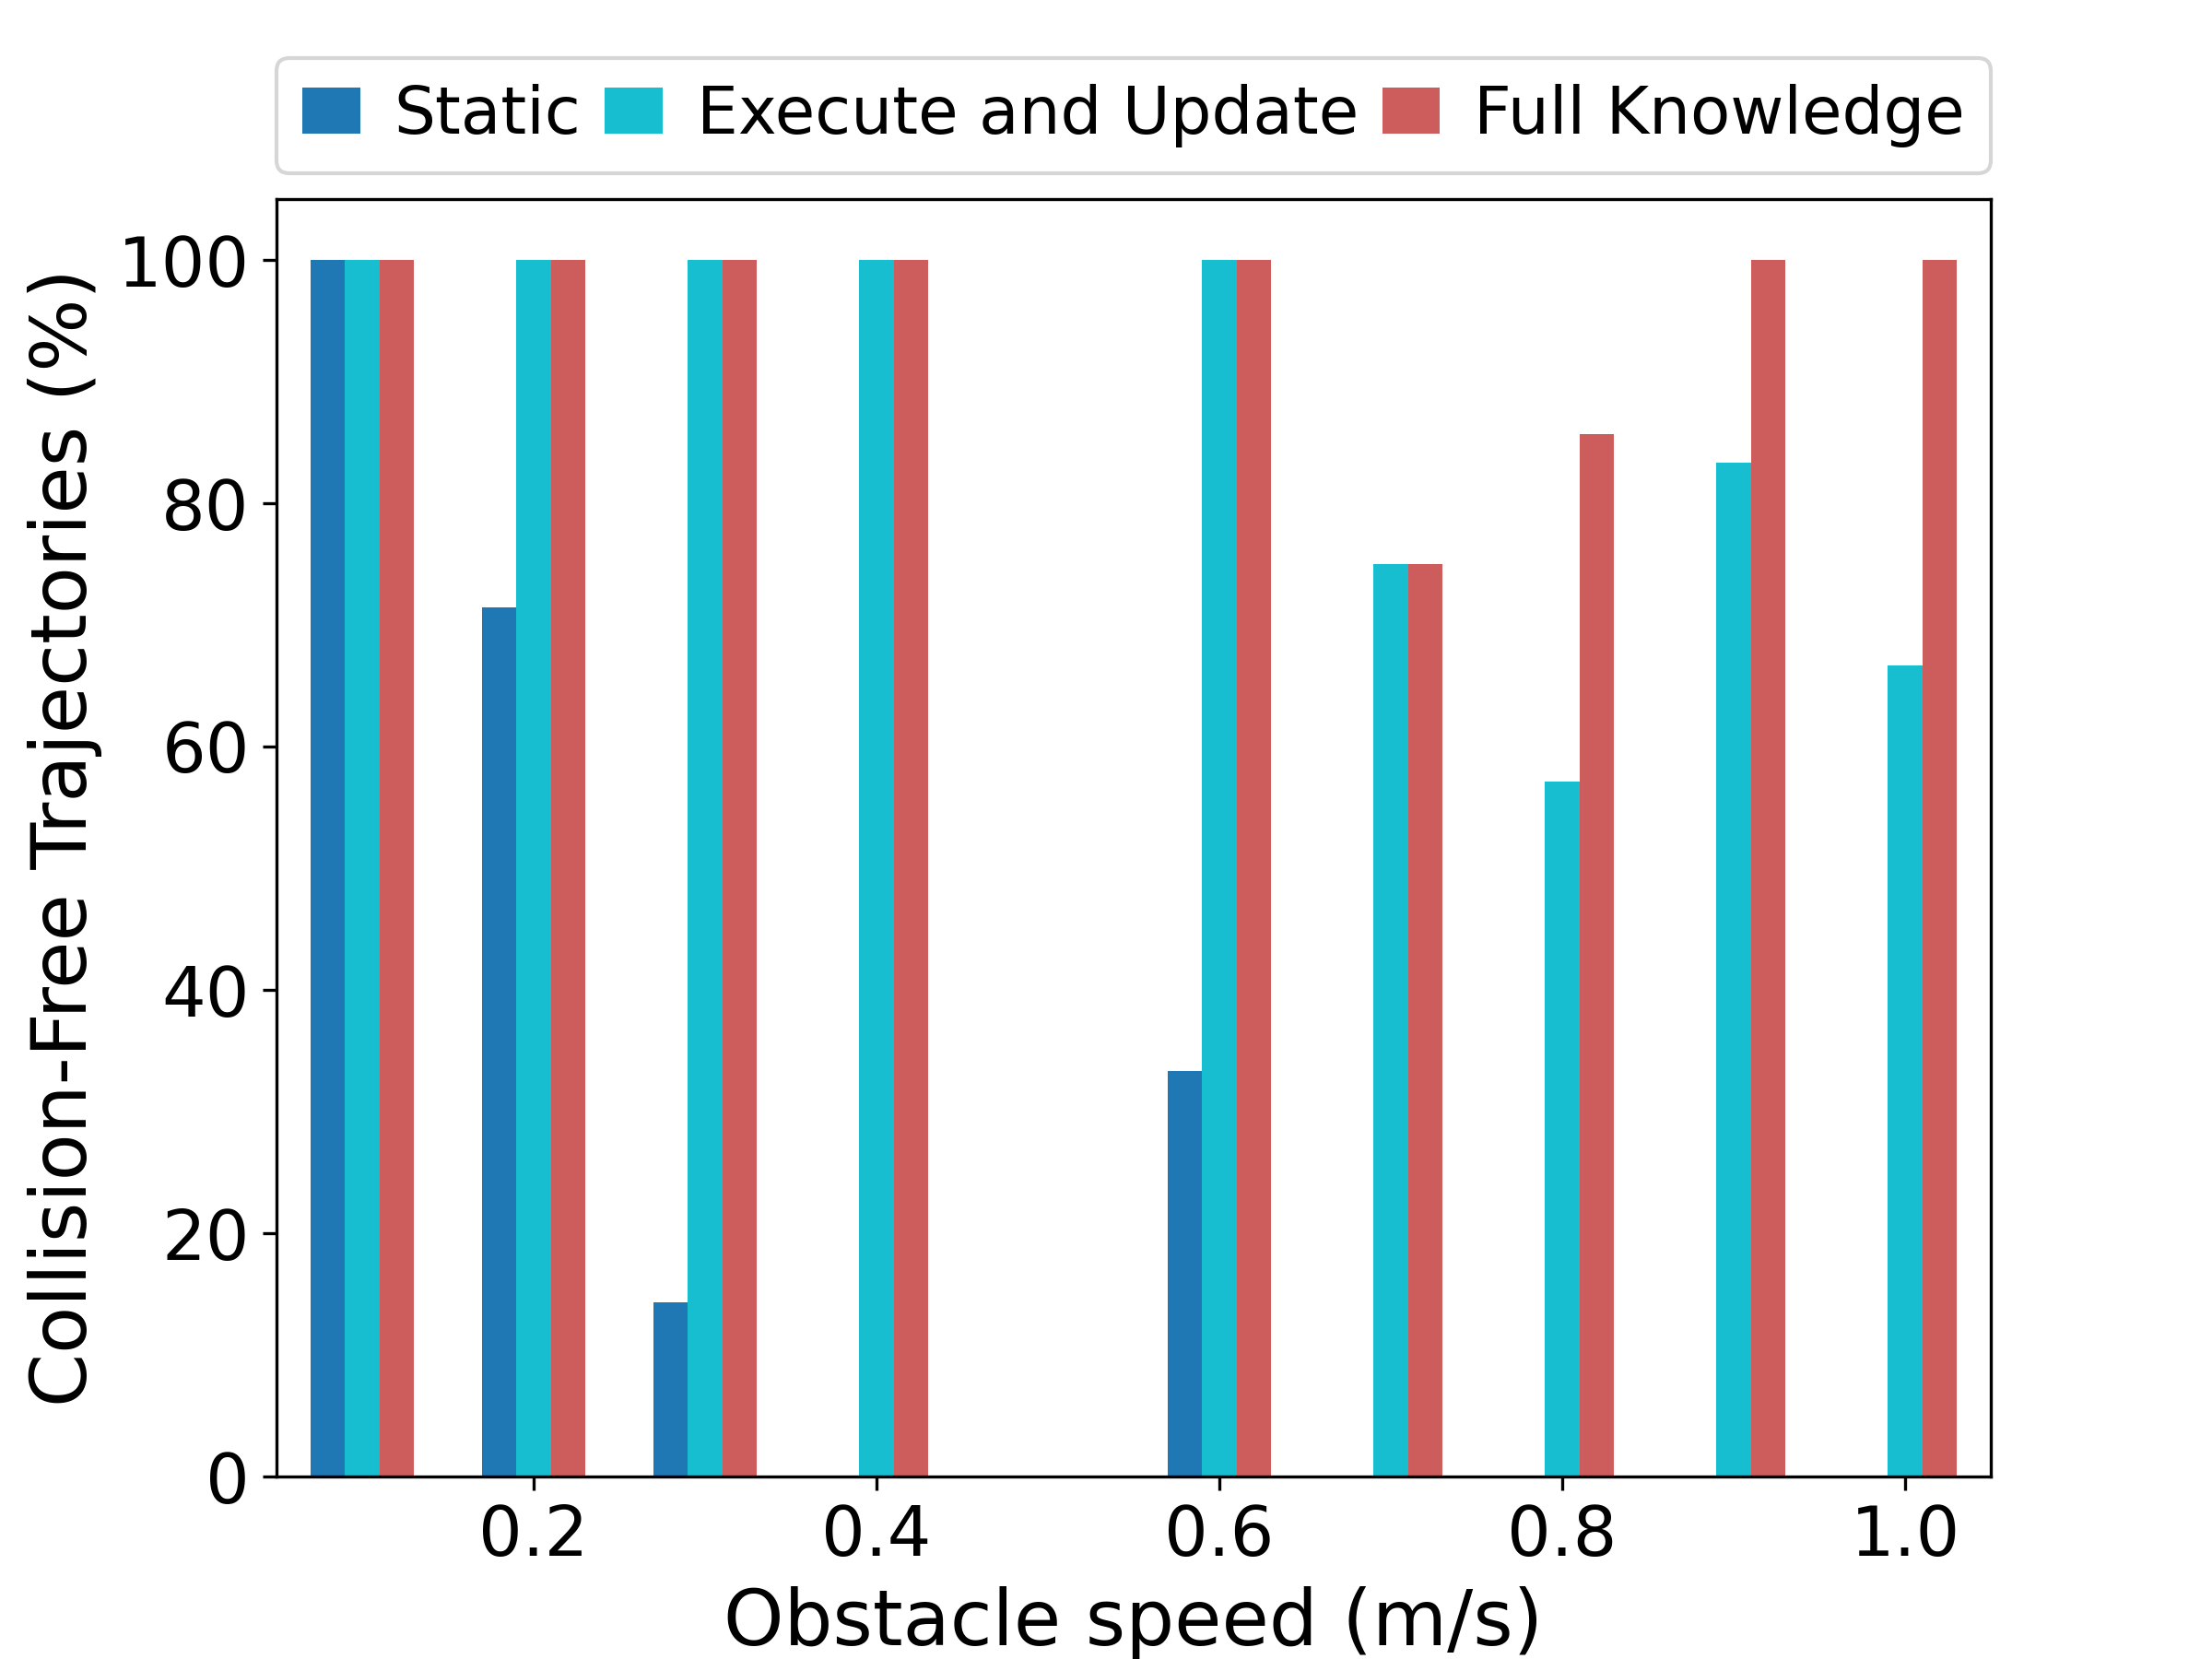

In [37]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=300,)    
# plt.figure(4);
plt.bar(speeds -0.02, 
        static_col_free_ratio *100, width=0.02, color='tab:blue', align='center', label='Static')
plt.bar(speeds, 
        update_col_free_ratio *100, width=0.02, color='tab:cyan', align='center', label='Execute and Update')
plt.bar(speeds +0.02,
        full_col_free_ratio *100, width=0.02, color='indianred', align='center', label='Full Knowledge')
plt.xlabel("Obstacle speed (m/s)", fontsize=20)
plt.ylabel("Collision-Free Trajectories (%)", fontsize=20)
plt.xlim([0.05, 1.05])
leg = plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0., fontsize=17, handletextpad=-0.6)
for handle in leg.legendHandles:
    handle.set_width(15.0)
# plt.savefig('SinglePillar_SpeedVsColFree_CF.png', dpi=300)
plt.show()